In [25]:
import numpy as np 
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chi2


In [26]:
df = pd.read_csv("../input/gtd/globalterrorismdb_0718dist.csv", encoding="ISO-8859-1",low_memory = False)

In [27]:
country_ana= dict()
for i in range(len(df['success'])):
    if df['country_txt'][i] not in country_ana:
        country_ana[df['country_txt'][i]]=[0,0]
    country_ana[df['country_txt'][i]][0]+=1
    if df['success'][i]==1:
        country_ana[df['country_txt'][i]][1]+=1

In [28]:
top_countries=[[],[],[]]
#l[0] stores names, l[1] stores corresponding group's number of attacks, l[2] stores number of successful attacks
for name in country_ana:
    if country_ana[name][0]>500:
        top_countries[0].append(name)
        top_countries[1].append(country_ana[name][0])
        top_countries[2].append(country_ana[name][1])
print(top_countries)
print(len(top_countries[1]))

[['Mexico', 'Philippines', 'Greece', 'United States', 'Italy', 'Guatemala', 'West Germany (FRG)', 'Spain', 'Egypt', 'Argentina', 'Lebanon', 'Turkey', 'Iran', 'United Kingdom', 'Colombia', 'Nicaragua', 'Pakistan', 'Israel', 'West Bank and Gaza Strip', 'India', 'France', 'Algeria', 'El Salvador', 'Thailand', 'Sudan', 'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Syria', 'South Africa', 'Kenya', 'Iraq', 'Somalia', 'Sri Lanka', 'Nigeria', 'Bangladesh', 'Indonesia', 'Libya', 'Nepal', 'Mali', 'Germany', 'Yemen', 'Burundi', 'Ukraine', 'Russia', 'Democratic Republic of the Congo'], [524, 6908, 1275, 2836, 1565, 2050, 541, 3249, 2479, 815, 2478, 4292, 684, 5235, 8306, 1970, 14368, 2183, 2227, 11960, 2693, 2743, 5320, 3849, 967, 546, 12731, 6096, 2365, 2201, 2016, 683, 24636, 4142, 3022, 3907, 1648, 761, 2249, 1215, 566, 735, 3347, 613, 1709, 2194, 775], [479, 5975, 1126, 2340, 1392, 1936, 465, 2818, 2011, 714, 2182, 3909, 594, 4206, 7712, 1939, 12600, 1683, 1766, 10280, 2481, 2561, 5227, 3626, 93

In [29]:
country_success_rate=[]
for i in range(len(top_countries[0])):
    country_success_rate.append(top_countries[2][i]*100/top_countries[1][i])

In [30]:
#sorting in decreasing order based on total number of attacks
for i in range(len(top_countries[0])):
    for j in range(i+1,len(top_countries[0])):
        if(country_success_rate[i]<country_success_rate[j]):
            temp=top_countries[1][i]
            temp2=top_countries[0][i]
            temp3=top_countries[2][i]
            temp4=country_success_rate[i]
            top_countries[1][i]=top_countries[1][j]
            top_countries[0][i]=top_countries[0][j]
            top_countries[2][i]=top_countries[2][j]
            country_success_rate[i]=country_success_rate[j]
            top_countries[1][j]=temp
            top_countries[0][j]=temp2
            top_countries[2][j]=temp3
            country_success_rate[j]=temp4

In [31]:
gname_count=dict()
for i in range(len(df['success'])):
    if df['gname'][i] not in gname_count:
        gname_count[df['gname'][i]]=[0,0]
    gname_count[df['gname'][i]][0]+=1
    if df['success'][i]==1:
        gname_count[df['gname'][i]][1]+=1
gname_count

{'MANO-D': [1, 1],
 '23rd of September Communist League': [44, 42],
 'Unknown': [82782, 71748],
 'Black Nationalists': [92, 77],
 'Tupamaros (Uruguay)': [41, 39],
 "New Year's Gang": [4, 3],
 'Weather Underground, Weathermen': [45, 39],
 'Left-Wing Militants': [173, 130],
 'Armed Commandos of Liberation': [13, 8],
 'Commune 1': [1, 1],
 'Eritrean Liberation Front': [21, 20],
 'Strikers': [48, 48],
 'Student Radicals': [74, 60],
 'White extremists': [105, 96],
 'Armed Forces of National Liberation- Venezuela (FALN)': [4, 4],
 "New People's Army (NPA)": [2772, 2457],
 'Armed Revolutionary Independence Movement (MIRA)': [30, 28],
 'Popular Front for the Liberation of Palestine (PFLP)': [153, 134],
 'Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)': [8, 8],
 '1st of May Group': [4, 2],
 'Rebel Armed Forces of Guatemala (FAR)': [36, 36],
 'Ku Klux Klan': [26, 25],
 'Popular Revolutionary Vanguard (VPR)': [5, 4],
 'Revolutionary Force 9': [3, 3],
 'Puerto Rican Nationalists'

In [32]:
top_gangs=[[],[],[]]
#l[0] stores names, l[1] stores corresponding group's number of attacks, l[2] stores number of successful attacks
for name in gname_count:
    if gname_count[name][0]>500 and name!='Unknown':
        top_gangs[0].append(name)
        top_gangs[1].append(gname_count[name][0])
        top_gangs[2].append(gname_count[name][1])
print(len(gname_count))
print(len(top_gangs[0]))

3537
32


In [33]:
group_success_rate=[]
for i in range(len(top_gangs[0])):
    group_success_rate.append(top_gangs[2][i]*100/top_gangs[1][i])

In [34]:
#sorting in decreasing order based on total number of attacks
for i in range(len(top_gangs[0])):
    for j in range(i+1,len(top_gangs[0])):
        if(group_success_rate[i]<group_success_rate[j]):
            temp=top_gangs[1][i]
            temp2=top_gangs[0][i]
            temp3=top_gangs[2][i]
            temp4=group_success_rate[i]
            top_gangs[1][i]=top_gangs[1][j]
            top_gangs[0][i]=top_gangs[0][j]
            top_gangs[2][i]=top_gangs[2][j]
            group_success_rate[i]=group_success_rate[j]
            top_gangs[1][j]=temp
            top_gangs[0][j]=temp2
            top_gangs[2][j]=temp3
            group_success_rate[j]=temp4

In [35]:
for i in range(len(top_countries[0])):
    print(top_countries[0][i],country_success_rate[i],top_countries[1][i])

Nicaragua 98.42639593908629 1970
El Salvador 98.25187969924812 5320
Sudan 96.48397104446742 967
Syria 96.27442071785552 2201
Burundi 96.24796084828711 613
Guatemala 94.4390243902439 2050
Peru 94.40616797900262 6096
Sri Lanka 94.2753143613501 3022
Thailand 94.20628734736295 3849
Chile 93.91120507399577 2365
Algeria 93.36492890995261 2743
Myanmar 93.22344322344323 546
South Africa 93.10515873015873 2016
Colombia 92.8485432217674 8306
Democratic Republic of the Congo 92.51612903225806 775
Mali 92.40282685512368 566
Bangladesh 92.17233009708738 1648
France 92.12773858150761 2693
Nigeria 91.9631430765293 3907
Somalia 91.83969097054563 4142
Mexico 91.41221374045801 524
Turkey 91.07642124883505 4292
Germany 89.65986394557824 735
Ukraine 89.46752486834406 1709
Kenya 89.0190336749634 683
Italy 88.94568690095846 1565
Iraq 88.73599610326352 24636
Greece 88.31372549019608 1275
Libya 88.30591373943975 2249
Lebanon 88.05488297013721 2478
Pakistan 87.69487750556793 14368
Argentina 87.60736196319019 8

In [36]:
for i in range(len(top_gangs[0])):
    print(top_gangs[0][i],group_success_rate[i],top_gangs[1][i])

Fulani extremists 99.02152641878669 511
Nicaraguan Democratic Force (FDN) 98.99441340782123 895
Farabundo Marti National Liberation Front (FMLN) 98.98537749925396 3351
Al-Qaida in Iraq 97.80564263322884 638
Corsican National Liberation Front (FLNC) 96.55712050078247 639
Tupac Amaru Revolutionary Movement (MRTA) 96.22980251346499 557
M-19 (Movement of April 19) 95.31531531531532 555
Liberation Tigers of Tamil Eelam (LTTE) 95.26774595267746 1606
Shining Path (SL) 95.21405049396267 4555
Separatists 95.07640067911714 589
Communist Party of India - Maoist (CPI-Maoist) 94.46219382321618 1878
Manuel Rodriguez Patriotic Front (FPMR) 94.4578313253012 830
National Liberation Army of Colombia (ELN) 94.17040358744394 1561
Kurdistan Workers' Party (PKK) 94.15584415584415 2310
Sikh Extremists 93.85474860335195 716
Tehrik-i-Taliban Pakistan (TTP) 93.78238341968913 1351
Boko Haram 92.92803970223325 2418
Donetsk People's Republic 92.78846153846153 624
Revolutionary Armed Forces of Colombia (FARC) 92.56

In [37]:
filtered_df = df[df.country_txt.isin(top_countries[0])]
filtered_df = filtered_df[filtered_df.gname.isin(top_gangs[0])]
print(filtered_df.shape,df.shape)
filtered_df

(57678, 135) (181691, 135)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
39,197001310001,1970,1,31,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
169,197004020001,1970,4,2,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
226,197004250001,1970,4,25,NaN,0,NaN,209,Turkey,10,...,NaN,NaN,NaN,NaN,PGIS,1,0,1,1,NaN
364,197006260001,1970,6,26,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,CAIN,0,0,1,1,NaN
365,197006270001,1970,6,27,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,CAIN,0,0,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181679,201712310012,2017,12,31,NaN,0,NaN,95,Iraq,10,...,NaN,"""13 IS militants killed in attack on paramilit...",NaN,NaN,START Primary Collection,0,1,0,1,NaN
181680,201712310013,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia's al-Shabab fires mortars at Ethiopia...","""Somalia: Al-Shabaab Militants Shell Ethiopian...",NaN,START Primary Collection,0,1,1,1,NaN
181683,201712310018,2017,12,31,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""Six Members Of One Family Shot Dead In Faryab...","""Highlights: Pakistan Pashto Press 02 January ...",NaN,START Primary Collection,0,0,0,0,NaN
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN


Text(0, 0.5, 'Number of Attacks')

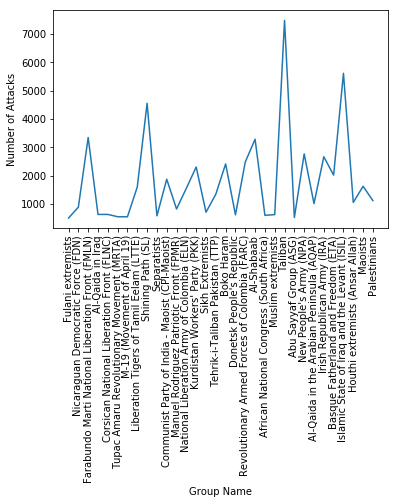

In [38]:
import matplotlib.pyplot as plt
plt.xticks(rotation = "vertical")
plt.plot(top_gangs[0],top_gangs[1])
plt.xlabel('Group Name')
plt.ylabel('Number of Attacks')


Text(0, 0.5, 'Number of Attack on the country')

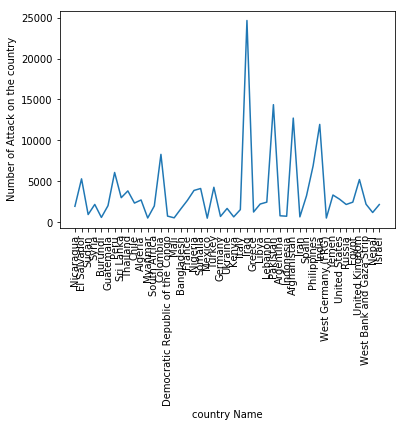

In [39]:
import matplotlib.pyplot as plt
plt.xticks(rotation = "vertical")
plt.plot(top_countries[0],top_countries[1])
plt.xlabel('country Name')
plt.ylabel('Number of Attack on the country')

In [40]:
count = 0
for i in filtered_df['success']:
    if i==1:
        count += 1
print(count, len(filtered_df)-count)
filtered_df['country_txt'].hasnans

52459 5219


False

In [41]:
cols=['imonth','iday','extended','vicinity','crit1','crit2','crit3','suicide','property','targtype1','attacktype1','gname','ransom'] #columns to be selected
for col in cols:
    analysis = filtered_df.groupby(col).success.value_counts()
    stat, p, dof, expected = chi2_contingency(analysis.unstack())
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print(col)
    print('dof=%d' % dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent,so we have to reject H0')
    else:
        print('Independent, so we cant reject reject H0')
        cols.remove(col)
    print('\n')
cols.remove('crit1')

imonth
dof=12
probability=0.950, critical=21.026, stat=nan
Independent (fail to reject H0)
significance=0.050, p=nan
Independent, so we cant reject reject H0


extended
dof=1
probability=0.950, critical=3.841, stat=316.905
Dependent (reject H0)
significance=0.050, p=0.000
Dependent,so we have to reject H0


vicinity
dof=2
probability=0.950, critical=5.991, stat=nan
Independent (fail to reject H0)
significance=0.050, p=nan
Independent, so we cant reject reject H0


crit2
dof=1
probability=0.950, critical=3.841, stat=3.618
Independent (fail to reject H0)
significance=0.050, p=0.057
Independent, so we cant reject reject H0


suicide
dof=1
probability=0.950, critical=3.841, stat=208.307
Dependent (reject H0)
significance=0.050, p=0.000
Dependent,so we have to reject H0


property
dof=2
probability=0.950, critical=5.991, stat=3631.813
Dependent (reject H0)
significance=0.050, p=0.000
Dependent,so we have to reject H0


targtype1
dof=20
probability=0.950, critical=31.410, stat=3225.838
Depen

/opt/conda/lib/python3.6/site-packages/scipy/stats/contingency.py:243: RuntimeWarning: invalid value encountered in less
  if np.any(observed < 0):


In [42]:
#dependence for weapon type
analysis_weapons = filtered_df.groupby('weaptype1').success.value_counts()
stat, p, dof, expected = chi2_contingency(analysis_weapons.unstack().fillna(0))
prob = 0.95
critical = chi2.ppf(prob, dof)
print('weaptype1')
print('dof=%d' % dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    cols.append('weaptype1')
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent,so we have to reject H0')
else:
    print('Independent, so we cant reject reject H0')
print('\n')

weaptype1
dof=9
probability=0.950, critical=16.919, stat=654.998
Dependent (reject H0)
significance=0.050, p=0.000
Dependent,so we have to reject H0




In [43]:
#dependence of country
analysis_country = filtered_df.groupby('country_txt').success.value_counts()
stat, p, dof, expected = chi2_contingency(analysis_country.unstack().fillna(0))
prob = 0.95
critical = chi2.ppf(prob, dof)
print('country_txt')
print('dof=%d' % dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    cols.append('country_txt')
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent,so we have to reject H0')
else:
    print('Independent, so we cant reject reject H0')
print('\n')

country_txt
dof=45
probability=0.950, critical=61.656, stat=1487.352
Dependent (reject H0)
significance=0.050, p=0.000
Dependent,so we have to reject H0




In [44]:
#dependence of day
analysis_day = filtered_df.groupby('iday').success.value_counts()
stat, p, dof, expected = chi2_contingency(analysis_day.unstack().fillna(0))
prob = 0.95
critical = chi2.ppf(prob, dof)
print('day')
print('dof=%d' % dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    cols.append('country_txt')
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent,so we have to reject H0')
else:
    print('Independent, so we cant reject reject H0')
print('\n')

day
dof=31
probability=0.950, critical=44.985, stat=96.689
Dependent (reject H0)
significance=0.050, p=0.000
Dependent,so we have to reject H0




In [45]:
cols.append('success')
cols

['iday',
 'extended',
 'crit3',
 'suicide',
 'property',
 'targtype1',
 'attacktype1',
 'gname',
 'ransom',
 'weaptype1',
 'country_txt',
 'country_txt',
 'success']

In [46]:
filtered_df_final = filtered_df[cols]

In [47]:
filtered_df_final.to_csv('file2.csv') 